In [1]:
import pandas as pd

In [2]:
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [3]:
import matplotlib.pyplot as pyplot

In [4]:
import pickle

In [5]:
from matplotlib import style

In [6]:
data = pd.read_csv("student-mat.csv", sep=";")

In [7]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
data = data[["G1","G2","G3","studytime","failures","absences"]]

In [9]:
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [10]:
predict = "G3"

In [11]:
x = np.array(data.drop([predict],1))
x.shape

(395, 5)

In [12]:
y = np.array(data[predict])
y.shape

(395,)

In [13]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size = 0.1)

In [14]:
linear = linear_model.LinearRegression()

In [15]:
linear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
acc=linear.score(x_test,y_test)

In [17]:
acc

0.8338042664314165

In [18]:
 linear.coef_

array([ 0.15800439,  0.96687665, -0.21422911, -0.31896232,  0.03312829])

In [19]:
linear.intercept_

-1.2732634373105949

In [20]:
predictions = linear.predict(x_test)

In [21]:
for x in range(len(predictions)):
    print(predictions[x],x_test[x],y_test[x])

-0.12167780294140673 [10  0  2  0  0] 0
12.707502696254842 [13 13  3  0  0] 14
11.70214942074394 [13 12  2  1  2] 12
15.171493880608269 [15 15  2  0  0] 15
12.829984008969825 [12 13  2  0  2] 12
12.169084270123044 [13 12  1  0  0] 12
13.38552791376379 [13 13  2  0 14] 14
12.194390291135322 [12 12  2  0 12] 11
9.577822213270222 [ 8 10  1  0  4] 10
2.8481201051374425 [7 4 1 2 0] 0
10.184348543807745 [11 10  1  0  8] 10
8.580212049631422 [10  9  2  0  0] 0
14.337130403302945 [15 14  2  0  4] 14
7.3635832141311734 [8 8 2 0 2] 8
11.120491680740685 [13 11  2  0  4] 11
11.399126061392542 [10 12  3  0  4] 12
18.95913586057071 [18 18  1  0  6] 18
15.709368844763313 [16 15  1  0  5] 16
13.873149106011534 [13 14  3  0  6] 14
11.793897220105992 [14 12  2  1  0] 12
7.139322241788575 [7 8 2 0 0] 0
12.987988394822152 [13 13  2  0  2] 13
7.666421381623069 [ 9  8  2  1 16] 7
10.804482909036032 [11 11  2  0  4] 11
9.455340900555239 [ 9 10  2  0  2] 10
6.544679089432066 [8 7 1 0 0] 6
6.970062419780966 [1

In [22]:
 with open("studentmodel.pickle","wb") as f:
        pickle.dump(linear,f)

In [23]:
pickle_in = open("studentmodel.pickle","rb")

In [24]:
linear = pickle.load(pickle_in)

In [26]:
style.use("ggplot")

In [34]:
p="G2"

<function matplotlib.pyplot.show(*args, **kw)>

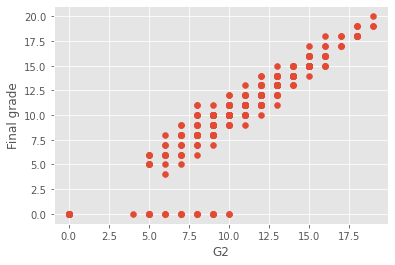

In [35]:
pyplot.scatter(data[p],data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final grade")
pyplot.show